In [1]:
import pandas as pd

C:\Users\hamza\AppData\Local\Temp\ipykernel_20368\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# df = pd.read_csv('players_blegium_japan.csv')
# df = pd.read_csv('timestampplayers.csv')
df = pd.read_csv('Data/playersNball.csv')


In [3]:
df_pressure= pd.DataFrame(columns=['position_x','position_y', 'pressure_rating'])

In [4]:
import numpy as np

In [5]:
# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Radius for pressure calculation
radius = 5

# Initialize lists to store x and y points
xpoints = []
ypoints = []
pressures = []
p=[]
ts=[]
team=[]
c=0
# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    if row['ball_posession'] == 1:
        # Reset the pressures list for each ball possession event
        pressures = []
        
        # Get the x, y coordinates of the ball possession event
        ball_pos_x = row['x']
        ball_pos_y = row['y']
        frame = row['frame']
        
        # Append x and y points
        xpoints.append(ball_pos_x)
        ypoints.append(ball_pos_y)
        team.append(row['teamId'])
        ts.append(row['timestamp'])
        # Calculate distances from the ball possession event to all other events in the same frame
        distances = []
        for _, event_row in df[(df['frame'] == frame) & (df['ball_posession'] == 0)].iterrows():
            event_x = event_row['x']
            event_y = event_row['y']
            distance = euclidean_distance((ball_pos_x, ball_pos_y), (event_x, event_y))
            
            # Calculate pressure rating considering the radius
            if distance <= radius:
                # Check if the event belongs to the opposite team
                if event_row['teamId'] != row['teamId']:
                    if distance == 5: 
                        pressures.append(0.3)
                    elif distance<5:
                        pressures.append(max(0, radius - distance))  # Subtract distance from radius and append to pressures list
                    
        
        # Calculate the average pressure rating for the frame
        if pressures:
            avg_pressure = max(pressures) # Average pressure if multiple players detected
            p.append(round(avg_pressure))  # Append average pressure to pressures list
        else: 
            p.append(0)

# Create DataFrame df_pressure
df_pressure = pd.DataFrame({
    "x_Point": xpoints,
    "y_Point": ypoints,
    "PressureRating": p,  # Use the pressures list
    "Team": team,
    "TimeStamp": ts
})
print(df_pressure)
#  if pressures:
#             if len(pressures)<3:
#                 avg_pressure = (sum(pressures) / len(pressures))  # Average pressure if multiple players detected
#                 p.append(avg_pressure)  # Append average pressure to pressures list
#             else:
#                 p.append(max(pressures))
#         else: 
#             p.append(0)


     x_Point  y_Point  PressureRating  Team  TimeStamp
0         30       81               4   Red       0.00
1         30       80               5   Red       0.00
2         29       80               4   Red       0.03
3         29       80               4   Red       0.05
4         29       79               0  Blue       0.07
..       ...      ...             ...   ...        ...
716       33       41               0  Blue      21.81
717       33       41               0  Blue      21.89
718       30       46               0  Blue      22.32
719       29       46               4  Blue      22.51
720       29       45               0  Blue      22.52

[721 rows x 5 columns]


In [6]:
#find maxium ycoordinate in both starting and ending point in df_fin
max_y = df_pressure['y_Point'].max()
max_y
over= max_y-80

In [7]:
df_pressure['y_Point'] = df_pressure['y_Point']-over

In [8]:
df_pressure.to_csv('pres.csv', index=False) 

In [9]:
df_pressure['Team'].value_counts()

Team
Blue    474
Red     247
Name: count, dtype: int64

In [10]:
#maximum pressure rating
max_pressure = df_pressure['PressureRating'].min()
print(max_pressure)

0


In [11]:
#df_pressure tosql


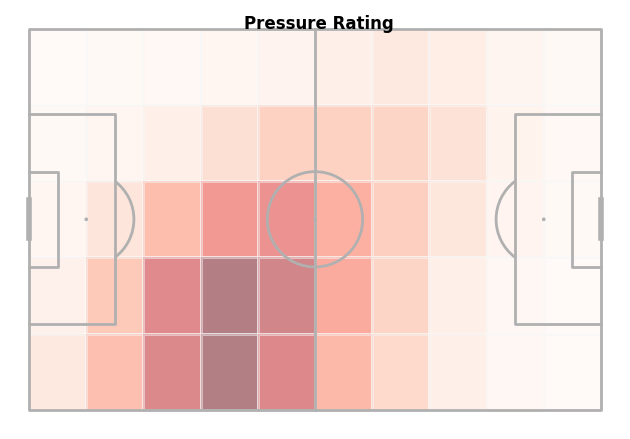

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter

from mplsoccer import Pitch

pitch = Pitch(line_zorder=2)
fig, ax = pitch.draw()

# Calculate the bin statistic with weights based on pressure rating
bin_statistic = pitch.bin_statistic(
    df_pressure['x_Point'], df_pressure['y_Point'], df_pressure['PressureRating'], bins=(10, 5)
)

# Gaussian smoothing of the bin statistic
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], sigma=1)

# Plot the smoothed heatmap
heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolor='#f9f9f9', alpha=0.5)
ax.text(45, 0, "Pressure Rating", fontsize=12, color='black', weight='bold')

plt.show()
